# What is deep learning?

Deep learning is considered a subfield of machine learning. Even though thereare countless inspirations from real neurons, we will focus on modelingeverything with formulas, intuitions, and theories that actually work.

In practice, deep learning is the scaling up of computational structures calledneural networks.

Why do we take the time to develop such approaches?

Because it is the optimal solution when working with really large-scale data rightnow.

> It is important to keep in mind that deep learning is all about learning
**powerful representations**. 

There is a huge shift from extracting features to learning features, and that is what deep learning is all about.

# Deep learning applications

In this course, you will get a general perspective of a huge variety of problems that you can solve with deep learning.

First, you will learn to formulate problems in terms of machine and deep learning. That’s a crucial skill that you will use throughout your career and projects. We will be focussing our applications to computer vision related tasks.

Secondly, you will learn the most basic components that tackle some of the following tasks:
- Image classification
- Image regression
- Object detection
- Generative models
- Embedded deep learning

Deep learning has already transformed a variety of businesses such as websearch, augmented reality, social networks, automobiles, retail, cybersecurity, and manufacturing. But the most exciting thing is the potential novel applications thatmay appear in the future. These projects can radically transform every industry.

Some experts claim that **AI is the new electricity**.

While this may be a disputable idea, what is for certain is that **deep learning is one of the most sought after and well-paid skills**.

So why stay behind?


# Linear Classifiers

Explore linear classifiers, their principles, and their training process.

We will cover the following:

- What is a linear classifier?
- Training a classifier
- Loss function
- Optimization and training process

# What is a linear classifier?

Suppose we want to build a machine learning model to classify the following points into two categories based on their color. It is very easy to see that we can find a single point that separates them perfectly. The goal of our model is to find this point.


![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/fig01.PNG)

The easiest way to do that is to build a linear classifier. Our classifier has the form $f(x,w) = w_{1}x_{1} + w_{2}$. The purpose of
$f(x, w)$ will be to find the parameters $w_{1}$ and $w_{2}$, so that any corresponding scalar point (1D) can be distinguished perfectly. If
$f (x, w) > 0$, the point belongs to the blue category. Otherwise, it belongs to the red.

Sounds easy?

Let’s extend this idea to 2D data points!

Each point will now be represented as $(x_{1} , x_{2})$.

For the 2D case, we need to find a line (instead of a point) that separates our 2Dpoints, so our classifier will be $(x, w) = w_{1}x_{1} + w_{2}x_{2} + w_{3}$. Again, the classifier should be trained to find the optimal
$w_{1} , w_{2}$ and $w_{3}$.


![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/fig02.PNG)

This idea can be naturally extended to arbitrary (N) dimensions. The line in the2D space will be a plane in the 3D space and N-plane in higher dimensions. We call this the hyperplane of the N-dimensional space that can separate the space into 2 classes (red and blue).

We will utilize linear algebra and matrices to formulate it. To facilitate thereadability, matrices will be denoted in capital letter.

As a result, we now have $f(x, W) = Wx + b$, where $x$ and $b$ are N-dimensional vectors while $W$ is an $N$ x $N$ matrix. We need to find the correct values of $W$ and $b$ to define a hyperplane. When we have those, we can receive the category $y$ for any data-point $x$.

From now on, we’ll denote our classifier as $f(x_{i} ,W)$

![linear](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/fig03.PNG)

In Pytorch, we can build a linear classifier with 5 inputs and 10 outputs using just one line of code. The following code will initialize a trainable matrix and a vector and every time we use class instance classifier, it will perform the operation
$y = Wx + b$

In [ ]:
## Basic imports
import torch
import torch.nn as nn
## initializes a matrix W and a vector b
classifier = nn.Linear(2, 2)

classifier

Linear(in_features=5, out_features=10, bias=True)

# Training a classifier

We know that we want to find the matrix $W$ and the vector $b$ in order to classify our examples. 

But how? 

First of all, we need training data. Training data are data-points ($x$) whose category (target class $t$) we are aware of. Thus, we can utilize it to “train” our classifier.

> “Training” a classifier refers to the notion of trying to find the matrix $W$ by feeding to its already known data points.

Because we know the “labels” (category) of the data, these training approaches are called **supervised**. The data are provided in pairs $(x,t)$. We use the $x$ as an input to the classifier and the labels $t$ to compute the loss (distance). Note that $y$ refers to the output of the classifier and will be equal to $y = Wx + b$

> Intuitively, we will push the randomly initialized model to learn this mapping from $x \rightarrow t$

Before we describe the process of training, we need to describe two more concepts.

# Loss function

**Loss (or cost) is a measure of how good or bad a classification of a data-point is.** Alternatively, it can be defined as how far the classifier’s prediction $y$ is, for the data-point $x$, from the actual class $t$. Let’s make that crystal clear:

Given a dataset $(x_{i} , t_{i})$ of N points where $x_{i}$ is an N-dimensional point in space and $t_{i}$ is an integer that defines the point’s category, loss is the distance between $f(x_{i} ,W)$ and $t_{i}$ .

$C_{i}(f (x_{i},W), t_{i})$ is the cost for a single example $x_{i}$.

The overall loss of the entire training data is simply the average of all the individual losses. However, in practice, we rarely average the loss over all datapoints.

Note that the choice of the loss function depends on the problem and the form of the data. In our case, from now on, we will use the mean squared error distance defined as:

> $C = \sum(f (x _{i},W) − t_{i})^{2}$

Notice that the sum is between the elements of the vector. Here is a code example:

In [ ]:
import torch
import torch.nn as nn

# define a linear model
model = nn.Linear(10,3)

# define loss fn
loss = nn.MSELoss()

## dummy input x
input_vector = torch.randn(10)
## class number 3, denoted as a vector with the class index to 1
target = torch.tensor([0,0,1])
## y in math
pred = model(input_vector)
output = loss(pred, target)

print("Prediction: " ,pred)
print("Output: " , output)

Prediction:  tensor([-0.8088, -0.0946,  0.2488], grad_fn=<AddBackward0>)
Output:  tensor(0.4091, grad_fn=<MseLossBackward0>)


It is important to understand that even though the target class is a scalar (3 in the example above), we convert it to a tensor. For three classes, you will have these possible target vectors $t$:

class 1 $\rightarrow$ [1,0,0]

class 2 $\rightarrow$ [0,1,0]

class 3 $\rightarrow$ [0,0,1]

This is also called **one-hot encoding** in machine learning.

# Optimization and training process

Optimization is the process of finding the weight matrix $W$ that minimizes the loss function. In other words, it is the process of selecting the individual weights $w_{i}$ so that the classifier’s prediction $y$ is as close as possible to the point’s real label $t$.

Mathematically this can be written as:

> $w′ = argmin_{w}(C(w))$

For now, let’s keep in mind that optimization is an abstract concept that describes how we select the matrix. We will dive into it in the next lesson where we will talk about neural networks.

Now, we can describe the training algorithm in its entirety:

Given a set of training examples $x_{i}$ with their labels $t_{i}$, we need to:

- Initialize the classifier $f(x_{i},W)$ with random weight $W$

- Feed a training example in the classifier and get the output $y$

- Compute the loss between the prediction $y_{i}$ and target $t_{i}$.

- Adjust the weights $W$ according to the loss $C_{i}$(next lesson).

- Repeat for all training examples.

This is the core idea behind all deep learning models. In the end, we will have a trained classifier that can be **generalized in previously UNSEEN examples**.

> The only step that should be unclear now is how we adjust the weights. We will discuss this in the next lesson.

**EXAMPLE: Fitting a Straight Line on 2D Data in PyTorch**

The objective here is to fit a straight line on a synthetic 2-dimensional or 2D data.

This is known as a Linear Regression Problem.

In [ ]:
# Import
seed_for_reproducibility = 3333
import numpy as np
np.random.seed(seed_for_reproducibility)
import random
random.seed(seed_for_reproducibility)
from matplotlib import pyplot as plt
%matplotlib inline

import torch
torch.manual_seed(seed_for_reproducibility)

**STEP 1: Generating Synthetic 2D data**

In order to find a straight line that fits a given data, we first need to generate the data itself. We are going to generate the synthetic data in such a way that the data points roughly lie on a stright line. We are going to do this by using some predefined m (slope) and c (intercept).

In [ ]:
# Defining the range of 'x', the independent variable
x_range = [-2000, 2000]

# Defining the extent of noise, which would be added to both the dependent as well as the independent variable
deviation = 100

# For the data points to roughly fall on a staright line, we need to define the slope and the intercept of that line
# Let's intoduce some randomness in the slope and intercept selection process
m_synthetic = random.randint(-100, 100)/100. # m_synthetic is real number from the set(-1.0, -0.99, -0.98 ...., 0.98, 0.99, 1.0)
c_synthetic = random.randint(-10, 10)        # c_synthetic is an integer from the set(-10, -9, -8 ..., 8, 9, 10)

print('\nm_synthetic: {}'.format(m_synthetic))
print('c_synthetic: {}'.format(c_synthetic))


m_synthetic: -0.67
c_synthetic: 6


Once the slope(m) and the intercept(c) have been randomly selected, we generate synthetic data points.

In [ ]:
# Defining the number of data points to be generated
num_points = 100

# Let's generate the synthetic data points
x_list = []
y_list = []
for _ in range(num_points):
    
    # Selecting a random integer from the predefined range
    x = random.randint(x_range[0] , x_range[1])
    
    # Calculating the dependent valiable 'y' using the formula of a straight line y = mx + c
    y = m_synthetic*x + c_synthetic
    
    # Randomly choosing the deviation (noise) for both the dependent as well as the independent variable, so that the dataset becomes a little noisy
    deviation_x = random.randint(-deviation , deviation)
    deviation_y = random.randint(-deviation , deviation)
    
    # Finally, appending the noisy data points in the respective lists
    x_list.append(x + deviation_x)
    y_list.append(y + deviation_y)

x_min, y_min, x_max, y_max = min(x_list) , min(y_list) , max(x_list) , max(y_list)
print('\nFollowing are the extreme ends of the synthetic data points...')
print('x_min, x_max: {}, {}'.format(x_min, x_max))
print('y_min, y_max: {}, {}'.format(y_min, y_max))


Following are the extreme ends of the synthetic data points...
x_min, x_max: -2022, 1966
y_min, y_max: -1392.3200000000002, 1352.16


Let’s visualize the synthetic data points and the line defined by m_synthetic amd c_synthetic.


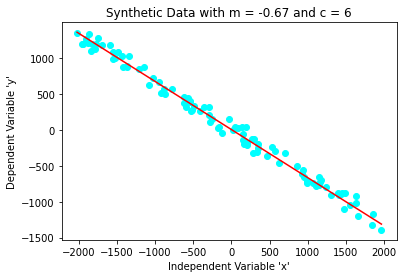

In [ ]:
# Let's now visualize how the synthetic data looks like 
plt.scatter(x_list, y_list , color = 'cyan')
plt.plot((x_min, x_max), (m_synthetic*x_min + c_synthetic, m_synthetic*x_max + c_synthetic), color = 'r')
plt.title('Synthetic Data with m = {} and c = {}'.format(m_synthetic, c_synthetic))
plt.xlabel("Independent Variable 'x'")
plt.ylabel("Dependent Variable 'y'")
plt.savefig('synthetic_m_and_c.jpg')

Our task here, is to find out the equation of a straight line which best fits all the data points !

In other words, we have to find the slope and the intercept of a line, which would give us the line that sits at the center of the distribution of the data points.

Since this is a Linear Regression Problem, we want to find the value of all the required parameters (slope m and intercept c in our case because the data lies in a 2D space)

Had the data been higher-dimensional, we would have to solve for more parameteres.

**STEP 2: Define the model architecture**

We are going to use PyTorch to solve this Linear Regression Problem. We need a very simple model which takes in a single scalar input and spits out some single scalar output.

In [ ]:
# Defining the model architecture.
class LinearRegressionModel(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)  # this layer of the model has a single neuron, that takes in one scalar input and gives out one scalar output. 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 

# Creating the model
model = LinearRegressionModel()

In [ ]:
# We can print the 'model' to see it's architecture
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Once, we have created the model, let's check out the paramters that we have in it.

There are going to be some learnable parameters in the model, which are randomly initialized at the beginning.

This is the how the initial parameters look like at the initial stage...

In [ ]:
for name, parameter in model.named_parameters():
    print('name           : {}'.format(name))
    print('parameter      : {}'.format(parameter.item()))
    print('learnable      : {}'.format(parameter.requires_grad))
    print('parameter.shape: {}'.format(parameter.shape))
    print('---------------------------------')

name           : linear.weight
parameter      : -0.19329047203063965
learnable      : True
parameter.shape: torch.Size([1, 1])
---------------------------------
name           : linear.bias
parameter      : -0.36674630641937256
learnable      : True
parameter.shape: torch.Size([1])
---------------------------------


Note that the parameter's initialized values are not at all, near the m_synthetic and c_synthetic values, which have been actually used to synthesize the data points.

But as we train the model, these values would approach to the values of m_synthetic and c_synthetic !

We will see this at the end of this notebook.

**STEP 3: Defining a Loss Fucntion and an Optimizer**

There must be a metric which would let us know how well is our model fitting on the given data.

That is exactly what a Loss Function does !

And PyTorch calculates the derivatives of the loss with respect to all the learnable parameters during the Back-Propagation, which is later used by an Optimizer to update all the parameters of the model, improving the model after every epoch.

By the way, one epoch is when the entire dataset is passed both forward and backward through the Neural Network only once

In [ ]:
# Defining the Loss Function
# Mean Squared Error is the most common choice of Loss Function for Linear Regression models.
criterion = torch.nn.MSELoss()

# Defining the Optimizer, which would update all the trainable parameters of the model, making the model learn the data distribution better and hence fit the distribution better.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005) 

In [ ]:
# We also need to convert all the data into tensors before we could use them for training our model.
data_x = torch.tensor([[x] for x in x_list], dtype = torch.float)
data_y = torch.tensor([[y] for y in y_list], dtype = torch.float)

**STEP 4: Training the Model and Plotting the Loss**


TRAINING...
loss:  290066.90625
loss:  233668.859375
loss:  186075.59375
loss:  146441.796875
loss:  113859.359375
loss:  87455.6875
loss:  66397.1328125
loss:  49895.39453125
loss:  37213.2421875
loss:  27672.869140625
loss:  20661.06640625
loss:  15636.830078125
loss:  12134.048828125
loss:  9762.8154296875
loss:  8207.2470703125
loss:  7220.21044921875
loss:  6615.5888671875
loss:  6258.6806640625
loss:  6055.96923828125
loss:  5945.36767578125
loss:  5887.44677734375
loss:  5858.3232421875
loss:  5844.21875
loss:  5837.56884765625
loss:  5834.427734375

Compare the learnt parameters with the original ones

m_synthetic     VS     m_learnt
     -0.67                   -0.6612429618835449

c_synthetic     VS     c_learnt
     6                   0.3956650197505951


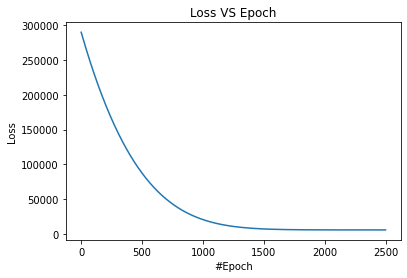

In [ ]:
losses = []         # to keep track of the epoch lossese 
slope_list = []     # to keep track of the slope learnt by the model
intercept_list = [] # to keep track of the intercept learnt by the model

EPOCHS = 2500
print('\nTRAINING...')
for epoch in range(EPOCHS):
    # We need to clear the gradients of the optimizer before running the back-propagation in PyTorch
    optimizer.zero_grad() 
    
    # Feeding the input data in the model and getting out the predictions
    pred_y = model(data_x)

    # Calculating the loss using the model's predictions and the real y values
    loss = criterion(pred_y, data_y) 

    # Back-Propagation
    loss.backward() 
    
    # Updating all the trainable parameters
    optimizer.step()
    
    # Appending the loss.item() (a scalar value)
    losses.append(loss.item())
    
    # Appending the learnt slope and intercept   
    slope_list.append(model.linear.weight.item())
    intercept_list.append(model.linear.bias.item())
    
    # We print out the losses after every 2000 epochs
    if (epoch)%100 == 0:
        print('loss: ', loss.item())

# Let's see what are the learnt parameters after having trained the model for hundreds of epochs
m_learnt = model.linear.weight.item()
c_learnt = model.linear.bias.item()

print('\nCompare the learnt parameters with the original ones')
print('\nm_synthetic     VS     m_learnt')
print('     {}                   {}'.format(m_synthetic, m_learnt))
print('\nc_synthetic     VS     c_learnt')
print('     {}                   {}'.format(c_synthetic, c_learnt))

# Plotting the epoch losses
plt.plot(losses)
plt.title('Loss VS Epoch')
plt.xlabel('#Epoch')
plt.ylabel('Loss')
plt.savefig('losses.jpg')

**STEP 5: Visualizing the Line Learnt by the Model**

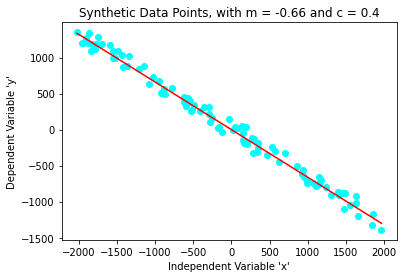

In [ ]:
plt.scatter(x_list, y_list , color = 'cyan')
plt.plot((x_min, x_max), (m_learnt*x_min + c_learnt, m_learnt*x_max + c_learnt), color = 'r')
plt.title('Synthetic Data Points, with m = {} and c = {}'.format(round(m_learnt, 2), round(c_learnt, 2)))
plt.xlabel("Independent Variable 'x'")
plt.ylabel("Dependent Variable 'y'")
plt.savefig('learnt_m_and_c.jpg')

Looks like the model has indeed fit a straight line on the given data distribution !!!

**Slope and Intercept during the training of the model**

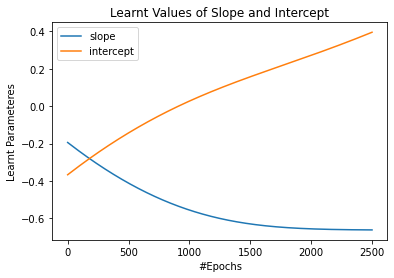

In [ ]:
plt.plot(slope_list)
plt.plot(intercept_list)
plt.title('Learnt Values of Slope and Intercept')
plt.legend(['slope', 'intercept'])
plt.xlabel('#Epochs')
plt.ylabel('Learnt Parameteres')
plt.savefig('learning_m_and_c.jpg')